<a href="https://colab.research.google.com/github/anujsaxena/AIML/blob/main/AIML_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Catboost implementation on wine dataset**

In [1]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [35]:
import pandas as pd
data = pd.read_csv("winemag_2.csv")
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [36]:
print(data.info)

<bound method DataFrame.info of        Unnamed: 0    country  \
0               0      Italy   
1               1   Portugal   
2               2         US   
3               3         US   
4               4         US   
...           ...        ...   
65494       65494     France   
65495       65495  Australia   
65496       65496         US   
65497       65497         US   
65498       65498      Spain   

                                             description  \
0      Aromas include tropical fruit, broom, brimston...   
1      This is ripe and fruity, a wine that is smooth...   
2      Tart and snappy, the flavors of lime flesh and...   
3      Pineapple rind, lemon pith and orange blossom ...   
4      Much like the regular bottling from 2012, this...   
...                                                  ...   
65494  Made from young vines from the Vaulorent porti...   
65495  This is a big, fat, almost sweet-tasting Caber...   
65496  Much improved over the unripe 2005, 

In [37]:
print(data.shape)

(65499, 14)


In [38]:
data[data.duplicated(subset=['title','description'])].shape[0]

2660

In [39]:
data.drop_duplicates(subset=['title','description'],inplace=True)
data.shape[0]

62839

In [40]:
print(data.head())

   Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0              

In [41]:
data.drop(columns=['description'],inplace=True)

In [42]:
print(data.head())

   Unnamed: 0   country                         designation  points  price  \
0           0     Italy                        Vulkà Bianco      87    NaN   
1           1  Portugal                            Avidagos      87   15.0   
2           2        US                                 NaN      87   14.0   
3           3        US                Reserve Late Harvest      87   13.0   
4           4        US  Vintner's Reserve Wild Child Block      87   65.0   

            province             region_1           region_2  \
0  Sicily & Sardinia                 Etna                NaN   
1              Douro                  NaN                NaN   
2             Oregon    Willamette Valley  Willamette Valley   
3           Michigan  Lake Michigan Shore                NaN   
4             Oregon    Willamette Valley  Willamette Valley   

          taster_name taster_twitter_handle  \
0       Kerin O’Keefe          @kerinokeefe   
1          Roger Voss            @vossroger   
2    

In [43]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [44]:
print(data.head())

    country                         designation  points  price  \
0     Italy                        Vulkà Bianco      87    NaN   
1  Portugal                            Avidagos      87   15.0   
2        US                                 NaN      87   14.0   
3        US                Reserve Late Harvest      87   13.0   
4        US  Vintner's Reserve Wild Child Block      87   65.0   

            province             region_1           region_2  \
0  Sicily & Sardinia                 Etna                NaN   
1              Douro                  NaN                NaN   
2             Oregon    Willamette Valley  Willamette Valley   
3           Michigan  Lake Michigan Shore                NaN   
4             Oregon    Willamette Valley  Willamette Valley   

          taster_name taster_twitter_handle  \
0       Kerin O’Keefe          @kerinokeefe   
1          Roger Voss            @vossroger   
2        Paul Gregutt           @paulgwine    
3  Alexander Peartree         

In [45]:
# Getting the insight of null values present in the feature columns
data.isnull().sum()

country                     32
designation              18164
points                       0
price                     4509
province                    32
region_1                 10294
region_2                 38653
taster_name              13227
taster_twitter_handle    15507
title                        0
variety                      0
winery                       0
dtype: int64

In [46]:
wine_price = data.groupby('variety')['price'].describe()

In [47]:
print(wine_price)

              count       mean        std   min    25%   50%    75%    max
variety                                                                   
Abouriou        1.0  75.000000        NaN  75.0  75.00  75.0  75.00   75.0
Agiorgitiko    32.0  24.343750  14.081810  10.0  13.75  21.0  29.25   66.0
Aglianico     145.0  39.751724  24.422363   6.0  24.00  35.0  46.00  180.0
Aidani          1.0  27.000000        NaN  27.0  27.00  27.0  27.00   27.0
Airen           2.0   8.500000   0.707107   8.0   8.25   8.5   8.75    9.0
...             ...        ...        ...   ...    ...   ...    ...    ...
Zinfandel    1313.0  29.746382  12.015315   5.0  20.00  29.0  37.00  100.0
Zlahtina        1.0  13.000000        NaN  13.0  13.00  13.0  13.00   13.0
Zweigelt       70.0  23.371429  11.357397   9.0  15.25  20.0  29.75   65.0
Çalkarası       1.0  19.000000        NaN  19.0  19.00  19.0  19.00   19.0
Žilavka         1.0  15.000000        NaN  15.0  15.00  15.0  15.00   15.0

[590 rows x 8 columns]


In [48]:
print(wine_price['mean'])

variety
Abouriou       75.000000
Agiorgitiko    24.343750
Aglianico      39.751724
Aidani         27.000000
Airen           8.500000
                 ...    
Zinfandel      29.746382
Zlahtina       13.000000
Zweigelt       23.371429
Çalkarası      19.000000
Žilavka        15.000000
Name: mean, Length: 590, dtype: float64


In [49]:
x=data['price']
print(wine_price['mean'])
var=x[0]
print(round(wine_price['mean'],2))

variety
Abouriou       75.000000
Agiorgitiko    24.343750
Aglianico      39.751724
Aidani         27.000000
Airen           8.500000
                 ...    
Zinfandel      29.746382
Zlahtina       13.000000
Zweigelt       23.371429
Çalkarası      19.000000
Žilavka        15.000000
Name: mean, Length: 590, dtype: float64
variety
Abouriou       75.00
Agiorgitiko    24.34
Aglianico      39.75
Aidani         27.00
Airen           8.50
               ...  
Zinfandel      29.75
Zlahtina       13.00
Zweigelt       23.37
Çalkarası      19.00
Žilavka        15.00
Name: mean, Length: 590, dtype: float64


In [51]:
data.isnull().sum()

country                     32
designation              18164
points                       0
price                     4509
province                    32
region_1                 10294
region_2                 38653
taster_name              13227
taster_twitter_handle    15507
title                        0
variety                      0
winery                       0
dtype: int64

In [52]:
data = data[data['price'].notna()]

In [53]:
data.isnull().sum()

country                     28
designation              16830
points                       0
price                        0
province                    28
region_1                  9426
region_2                 34248
taster_name              12328
taster_twitter_handle    14585
title                        0
variety                      0
winery                       0
dtype: int64

In [54]:
data = data[data['variety'].notna()]

In [55]:
data.isnull().sum()

country                     28
designation              16830
points                       0
price                        0
province                    28
region_1                  9426
region_2                 34248
taster_name              12328
taster_twitter_handle    14585
title                        0
variety                      0
winery                       0
dtype: int64

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
X=data.drop(columns=['points'])
X=X.fillna(0)
y=data['points']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11032022)

In [57]:
print(X_test)

         country               designation  price          province  \
27112     Brazil    Aurora Cellars Reserva   15.0      Serra Gaúcha   
1346   Argentina                         0   11.0  Mendoza Province   
6456          US  The Enchantress Old Vine   28.0        Washington   
10247         US          Burbank Vineyard   40.0        California   
26455         US                    Improv   38.0        California   
...          ...                       ...    ...               ...   
19301         US     Monarch Mine Vineyard   30.0        California   
35532     France                         0   17.0          Bordeaux   
9152       Chile                 Selección   12.0      Maipo Valley   
30414      Chile                   Reserva   12.0  Colchagua Valley   
14767     France                         0   18.0            Alsace   

               region_1          region_2        taster_name  \
27112                 0                 0  Michael Schachner   
1346            Men

In [58]:
print(y_test)

27112    82
1346     86
6456     91
10247    91
26455    93
         ..
19301    94
35532    87
9152     83
30414    87
14767    90
Name: points, Length: 11666, dtype: int64


In [59]:
#To be used during Catboost's Feature Importance extractor
categorical_features_indices =np.where(X.dtypes == np.object)[0]

y=data['points']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [60]:
categorical_features_indices

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [61]:
from catboost import Pool, CatBoostRegressor, cv
model = CatBoostRegressor(random_seed = 350,loss_function = 'RMSE',iterations=350)
#fitting the train data

In [62]:
model.fit(X_train, y_train,cat_features = categorical_features_indices,verbose=False)

In [63]:
pred = model.predict(X_test)
print(pred)

[82.99746405 85.03282573 90.33068084 ... 85.19491982 85.76260984
 89.24497254]


Text(0, 0.5, 'predcitions')

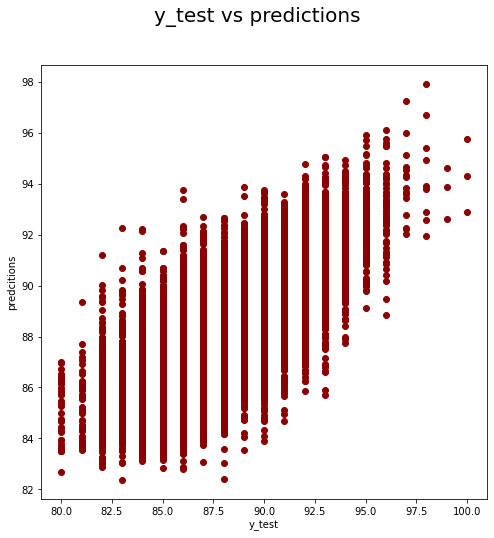

In [64]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
plt.scatter(y_test,pred,color='darkred')
# Plot-label
fig.suptitle('y_test vs predictions',fontsize = 20)

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')

Text(0.5, 0.98, 'Residual Analysis')

<Figure size 576x576 with 0 Axes>

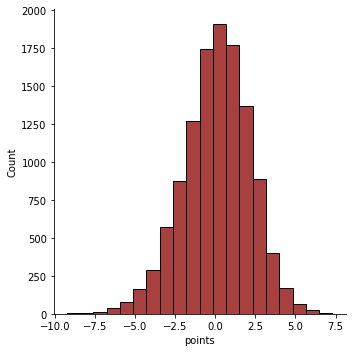

In [65]:
import seaborn as sns
fig=plt.figure(figsize=(8,8))
sns.displot((y_test-pred),bins=20,color='darkred')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 


In [66]:
from sklearn import metrics
print('Mean Absolute Error     MAE:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error      MSE:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error     MAE: 1.64348793851529
Mean Squared Error      MSE: 4.332231053083578
Root Mean Squared Error RMSE: 2.0814012234750843


In [68]:
errors = abs(pred - y_test)
print(errors)
mape = (errors / y_test)*100
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print(accuracy)

27112    0.997464
1346     0.967174
6456     0.669319
10247    1.144714
26455    2.489327
           ...   
19301    3.269521
35532    0.617721
9152     2.194920
30414    1.237390
14767    0.755027
Name: points, Length: 11666, dtype: float64
27112    1.216420
1346     1.124621
6456     0.735516
10247    1.257927
26455    2.676696
           ...   
19301    3.478214
35532    0.710024
9152     2.644482
30414    1.422288
14767    0.838919
Name: points, Length: 11666, dtype: float64
98.13640293593605
